# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
data = pd.read_csv('marketing.csv')
print(data.head())
print(data.shape)
print(data.info())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0    4/9/2012       58       635  ...                   10                  4   
1    8/3/2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3   10/2/2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  Accepted

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [3]:
missing_percentage = data.isnull().mean() * 100
print("\nPercentage of missing values:")
print(missing_percentage)

data = data.dropna()


Percentage of missing values:
ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64


### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [4]:
data = data.drop_duplicates()

### 5. Drop the columns which you think redundant for the analysis 

In [5]:
columns_to_drop = ['ID', 'Dt_Customer']
data = data.drop(columns_to_drop, axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [6]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'], 'relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [7]:
data['Total_Expenses'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [8]:
data['Num_Total_Purchases'] = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [9]:
data['Kids'] = data['Kidhome'] + data['Teenhome']

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [10]:
data['TotalAcceptedCmp'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)


### 11. Drop those columns which we have used above for obtaining new features

In [11]:
columns_to_drop = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'Kidhome', 'Teenhome',
                   'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
data = data.drop(columns_to_drop, axis=1)

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [12]:
data['age'] = 2023 - data['Year_Birth']
data = data.drop('Year_Birth', axis=1)

### 13. Encode the categorical variables in the dataset

In [13]:
categorical_cols = ['Education', 'Marital_Status']
label_encoder = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(label_encoder.fit_transform)


### 14. Standardize the columns, so that values are in a particular range

In [14]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [15]:
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled)
num_components = pca.n_components_
print("\nNumber of PCA components explaining 90-95% variance:", num_components)


Number of PCA components explaining 90-95% variance: 9


### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [16]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_pca)

C:\Users\Pruthvi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

In [17]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clusters = agg_clustering.fit_predict(data_scaled)

### Visualization and Interpretation of results

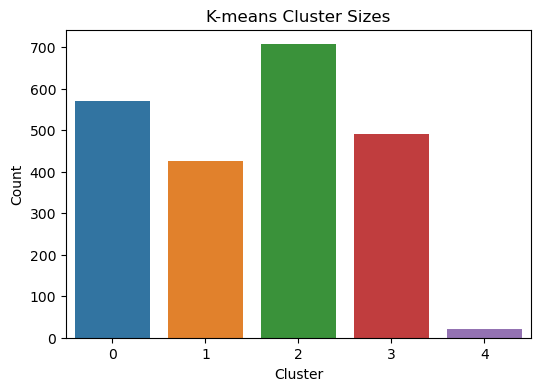

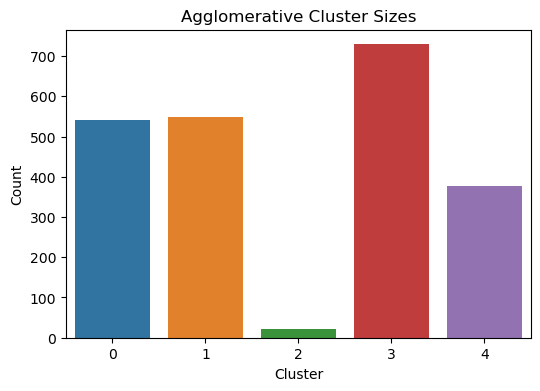

In [18]:
# Visualizing Cluster Sizes
kmeans_cluster_counts = pd.Series(clusters).value_counts().sort_index()
plt.figure(figsize=(6, 4))
sns.barplot(x=kmeans_cluster_counts.index, y=kmeans_cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('K-means Cluster Sizes')
plt.show()

agg_cluster_counts = pd.Series(agg_clusters).value_counts().sort_index()
plt.figure(figsize=(6, 4))
sns.barplot(x=agg_cluster_counts.index, y=agg_cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Agglomerative Cluster Sizes')
plt.show()

-----
## Happy Learning
-----